In [39]:
import tweepy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [40]:
# Connection to the api
api_key = 'f9QDFkLm0hRjJtlqSZMTTEvxZ'
api_key_secret = 'CiS03yMWCwX7Xhubw3AF8wU79F5bDpdU0VtHsC8K24oWBEt7NT'
access_token = '1223293246681559042-jSkfiFCdGtpHTcFMOS7zqvaOWVYmBm'
access_token_secret = 'ITPw91RpeO6ONMiLuKfE8cOeQnHZOvpDSx2oRoOGHn1QL'

#bearer_token = 'AAAAAAAAAAAAAAAAAAAAANNjCQEAAAAA0tQMCT0VtM7NNbjKb5pY%2BUqnzyU%3D5XXmWifVd9R7LJL08OHXaDzdOZttCxETPAycpbsIMCqmxzwSmU'
            # o de cima ê novo tbm

In [41]:
authenticator = tweepy.OAuthHandler(api_key, api_key_secret) 
authenticator.set_access_token(access_token, access_token_secret) 

api = tweepy.API(authenticator, wait_on_rate_limit=True)

In [42]:
crypto_currency = 'Ethereum'

search = f'#{crypto_currency} -filter:retweets'

tweet_cursor = tweepy.Cursor(api.search_tweets, q=search, lang='en', tweet_mode='extended').items(100) # api.search_tweets

tweets = [tweet.full_text for tweet in tweet_cursor]

In [43]:
new = []
for tw in api.search_tweets(search, count=200):
    date = tw._json['created_at']
    text = tw._json['text']
    new.append({'date': date, 'text': text})

In [44]:
import pandas as pd
tweetsdf = pd.DataFrame(new)

In [45]:
tweetsdf

,date,text
0,Thu Jun 09 11:09:35 +0000 2022,@web3_coin #Ethereum #Airdrops #Ripple @Shanil...
1,Thu Jun 09 11:09:30 +0000 2022,@Fenerbahce in #PayBolt there is: ecommerce pl...
2,Thu Jun 09 11:09:29 +0000 2022,For Sale Blockchain Domains!\nMake an offer:\n...
3,Thu Jun 09 11:09:26 +0000 2022,#hepsiburada \nLive life to the fullest and fo...
4,Thu Jun 09 11:09:25 +0000 2022,Requesting faucet funds into 0xD5604397Cf642c4...
...,...,...
77,Thu Jun 09 11:03:29 +0000 2022,LBank Exchange Will List Lego Coin (LEGO) on J...
78,Thu Jun 09 11:03:29 +0000 2022,LBank Exchange Will List Source Token (SRCX) o...
79,Thu Jun 09 11:03:29 +0000 2022,ITEMVERSE (ITEM) Is Now Available for Trading ...
80,Thu Jun 09 11:03:22 +0000 2022,Check out my first NFT on @makersplace \nhttps...


In [46]:
a = tweetsdf['date'][0].split()
a


['Thu', 'Jun', '09', '11:09:35', '+0000', '2022']

In [47]:
a = a[2] + ' ' + a[1] + ' ' + a[5] #+ ' ' + a[3]

In [48]:
a

'09 Jun 2022'

In [49]:
def date_change(a):

    a = tweetsdf['date'][0].split()

    return a[2] + ' ' + a[1] + ' ' + a[5]

In [50]:
tweetsdf

,date,text
0,Thu Jun 09 11:09:35 +0000 2022,@web3_coin #Ethereum #Airdrops #Ripple @Shanil...
1,Thu Jun 09 11:09:30 +0000 2022,@Fenerbahce in #PayBolt there is: ecommerce pl...
2,Thu Jun 09 11:09:29 +0000 2022,For Sale Blockchain Domains!\nMake an offer:\n...
3,Thu Jun 09 11:09:26 +0000 2022,#hepsiburada \nLive life to the fullest and fo...
4,Thu Jun 09 11:09:25 +0000 2022,Requesting faucet funds into 0xD5604397Cf642c4...
...,...,...
77,Thu Jun 09 11:03:29 +0000 2022,LBank Exchange Will List Lego Coin (LEGO) on J...
78,Thu Jun 09 11:03:29 +0000 2022,LBank Exchange Will List Source Token (SRCX) o...
79,Thu Jun 09 11:03:29 +0000 2022,ITEMVERSE (ITEM) Is Now Available for Trading ...
80,Thu Jun 09 11:03:22 +0000 2022,Check out my first NFT on @makersplace \nhttps...


In [51]:
tweetsdf['date'] = tweetsdf.apply(date_change, axis=1)
tweetsdf

,date,text
0,09 Jun 2022,@web3_coin #Ethereum #Airdrops #Ripple @Shanil...
1,09 Jun 2022,@Fenerbahce in #PayBolt there is: ecommerce pl...
2,09 Jun 2022,For Sale Blockchain Domains!\nMake an offer:\n...
3,09 Jun 2022,#hepsiburada \nLive life to the fullest and fo...
4,09 Jun 2022,Requesting faucet funds into 0xD5604397Cf642c4...
...,...,...
77,09 Jun 2022,LBank Exchange Will List Lego Coin (LEGO) on J...
78,09 Jun 2022,LBank Exchange Will List Source Token (SRCX) o...
79,09 Jun 2022,ITEMVERSE (ITEM) Is Now Available for Trading ...
80,09 Jun 2022,Check out my first NFT on @makersplace \nhttps...


In [52]:
tweetsdf

,date,text
0,09 Jun 2022,@web3_coin #Ethereum #Airdrops #Ripple @Shanil...
1,09 Jun 2022,@Fenerbahce in #PayBolt there is: ecommerce pl...
2,09 Jun 2022,For Sale Blockchain Domains!\nMake an offer:\n...
3,09 Jun 2022,#hepsiburada \nLive life to the fullest and fo...
4,09 Jun 2022,Requesting faucet funds into 0xD5604397Cf642c4...
...,...,...
77,09 Jun 2022,LBank Exchange Will List Lego Coin (LEGO) on J...
78,09 Jun 2022,LBank Exchange Will List Source Token (SRCX) o...
79,09 Jun 2022,ITEMVERSE (ITEM) Is Now Available for Trading ...
80,09 Jun 2022,Check out my first NFT on @makersplace \nhttps...


In [53]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brunogama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brunogama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [55]:
# adding a counter to check the progress of the algo while it runs
global counter
counter = 0
sentence = tweetsdf['text']
def preprocess(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

In [56]:
sentence

0     @web3_coin #Ethereum #Airdrops #Ripple @Shanil...
1     @Fenerbahce in #PayBolt there is: ecommerce pl...
2     For Sale Blockchain Domains!\nMake an offer:\n...
3     #hepsiburada \nLive life to the fullest and fo...
4     Requesting faucet funds into 0xD5604397Cf642c4...
                            ...                        
77    LBank Exchange Will List Lego Coin (LEGO) on J...
78    LBank Exchange Will List Source Token (SRCX) o...
79    ITEMVERSE (ITEM) Is Now Available for Trading ...
80    Check out my first NFT on @makersplace \nhttps...
81    Oh, that's the fine line between reality and f...
Name: text, Length: 82, dtype: object

In [57]:
#get rid of links and hashtags
tweetsdf["text"] = tweetsdf["text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))

#get rid of non-ascii characters

tweetsdf = tweetsdf.replace(r'\W+', ' ', regex=True)
tweetsdf

,date,text
0,09 Jun 2022,Ethereum Airdrops Ripple
1,09 Jun 2022,in PayBolt there is ecommerce plugin to enable...
2,09 Jun 2022,For Sale Blockchain Domains Make an account wi...
3,09 Jun 2022,hepsiburada Live life to the fullest and focu...
4,09 Jun 2022,Requesting faucet funds into 0xD5604397Cf642c4...
...,...,...
77,09 Jun 2022,LBank Exchange Will List Lego Coin LEGO on Jun...
78,09 Jun 2022,LBank Exchange Will List Source Token SRCX on ...
79,09 Jun 2022,ITEMVERSE ITEM Is Now Available for Trading on...
80,09 Jun 2022,Check out my first NFT on nft nftart nftcommun...


In [58]:
from nltk.tokenize import word_tokenize

tokenizer = RegexpTokenizer(r'\w+')


In [59]:
def tokenizer_and_remove_pontuation(tweetsdf):
    tokens = word_tokenize(tweetsdf['text'])
    return [token.lower() for token in tokens if token.isalpha()]

tweetsdf['text'] = tweetsdf.apply(tokenizer_and_remove_pontuation, axis=1)

In [60]:
tweetsdf

,date,text
0,09 Jun 2022,"[ethereum, airdrops, ripple]"
1,09 Jun 2022,"[in, paybolt, there, is, ecommerce, plugin, to..."
2,09 Jun 2022,"[for, sale, blockchain, domains, make, an, acc..."
3,09 Jun 2022,"[hepsiburada, live, life, to, the, fullest, an..."
4,09 Jun 2022,"[requesting, faucet, funds, into, on, the, rin..."
...,...,...
77,09 Jun 2022,"[lbank, exchange, will, list, lego, coin, lego..."
78,09 Jun 2022,"[lbank, exchange, will, list, source, token, s..."
79,09 Jun 2022,"[itemverse, item, is, now, available, for, tra..."
80,09 Jun 2022,"[check, out, my, first, nft, on, nft, nftart, ..."


In [61]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [62]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")

In [63]:
tweetsdf['text'] = tweetsdf['text'].apply(lambda x : ' '.join(x))

In [64]:

tweetsdf['sentiment'] = tweetsdf['text'].apply(lambda x : nlp(x)._.polarity)
tweetsdf = tweetsdf.sort_values('sentiment').reset_index(drop=True)
tweetsdf

,date,text,sentiment
0,09 Jun 2022,coolwhipeum collectible rarible ethereum nonfu...,-0.500000
1,09 Jun 2022,look what i found golgotha collectible rarible...,-0.500000
2,09 Jun 2022,i ve just created cubeevader collectible rarib...,-0.500000
3,09 Jun 2022,things you need to do during this bear market ...,-0.291667
4,09 Jun 2022,ethereum rank now high low eth,-0.213333
...,...,...,...
77,09 Jun 2022,paybolt s pos terminal is for brick and mortar...,0.450000
78,09 Jun 2022,gm to everyone sending eth as rewards to your ...,0.500000
79,09 Jun 2022,coinboost found ethereum in a blue vault at th...,0.500000
80,09 Jun 2022,found ethereum in a user vault at this locatio...,1.000000


In [65]:
tweetsdf['sentiment'].round(2)

0    -0.50
1    -0.50
2    -0.50
3    -0.29
4    -0.21
      ... 
77    0.45
78    0.50
79    0.50
80    1.00
81    1.00
Name: sentiment, Length: 82, dtype: float64

In [66]:
# Clean as much as possible, but not apply strong editing to the text, yet
sentence = sentence
tokenizer = RegexpTokenizer(r'\w+')

In [67]:
def preprocess(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

  #clean as much as possible, but not apply strong editing to the text, yet
  sentence=str(sentence)
  tokenizer = RegexpTokenizer(r'\w+')

  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokens = tokenizer.tokenize(rem_num)
  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  
  if stemming == True and lemmatizing == False:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(stem_words)

  if stemming == False and lemmatizing == True:
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

  if stemming == True and lemmatizing == True:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)
  
  #at the end of the algo we return filtered words
  return " ".join(filtered_words)

In [68]:
# Preprocess the sentiment text

tweetsdf['text'] = tweetsdf['text'].apply(lambda x: preprocess(x, stemming=False, lemmatizing=True))
tweetsdf

,date,text,sentiment
0,09 Jun 2022,coolwhipeum collectible rarible ethereum nonfu...,-0.500000
1,09 Jun 2022,look found golgotha collectible rarible ethere...,-0.500000
2,09 Jun 2022,created cubeevader collectible rarible ethereu...,-0.500000
3,09 Jun 2022,thing need bear market focus income work hard ...,-0.291667
4,09 Jun 2022,ethereum rank high low eth,-0.213333
...,...,...,...
77,09 Jun 2022,paybolt po terminal brick mortar merchant spee...,0.450000
78,09 Jun 2022,everyone sending eth reward top partner amp co...,0.500000
79,09 Jun 2022,coinboost found ethereum blue vault location j...,0.500000
80,09 Jun 2022,found ethereum user vault location join playin...,1.000000


In [69]:
tweetsdf

,date,text,sentiment
0,09 Jun 2022,coolwhipeum collectible rarible ethereum nonfu...,-0.500000
1,09 Jun 2022,look found golgotha collectible rarible ethere...,-0.500000
2,09 Jun 2022,created cubeevader collectible rarible ethereu...,-0.500000
3,09 Jun 2022,thing need bear market focus income work hard ...,-0.291667
4,09 Jun 2022,ethereum rank high low eth,-0.213333
...,...,...,...
77,09 Jun 2022,paybolt po terminal brick mortar merchant spee...,0.450000
78,09 Jun 2022,everyone sending eth reward top partner amp co...,0.500000
79,09 Jun 2022,coinboost found ethereum blue vault location j...,0.500000
80,09 Jun 2022,found ethereum user vault location join playin...,1.000000


In [70]:
tweetsdf['sentiment'].round(2)
tweetsdf

,date,text,sentiment
0,09 Jun 2022,coolwhipeum collectible rarible ethereum nonfu...,-0.500000
1,09 Jun 2022,look found golgotha collectible rarible ethere...,-0.500000
2,09 Jun 2022,created cubeevader collectible rarible ethereu...,-0.500000
3,09 Jun 2022,thing need bear market focus income work hard ...,-0.291667
4,09 Jun 2022,ethereum rank high low eth,-0.213333
...,...,...,...
77,09 Jun 2022,paybolt po terminal brick mortar merchant spee...,0.450000
78,09 Jun 2022,everyone sending eth reward top partner amp co...,0.500000
79,09 Jun 2022,coinboost found ethereum blue vault location j...,0.500000
80,09 Jun 2022,found ethereum user vault location join playin...,1.000000


In [71]:
tweetsdf['sentiment'].value_counts() > 0

 0.000000    True
-0.500000    True
 0.166667    True
 1.000000    True
 0.500000    True
 0.136364    True
 0.181818    True
 0.450000    True
 0.443182    True
 0.416667    True
 0.400000    True
 0.300000    True
 0.250000    True
-0.075000    True
-0.056818    True
-0.291667    True
 0.100000    True
 0.062500    True
 0.010000    True
-0.213333    True
-0.025000    True
 0.175000    True
Name: sentiment, dtype: bool

In [72]:
tweetsdf

,date,text,sentiment
0,09 Jun 2022,coolwhipeum collectible rarible ethereum nonfu...,-0.500000
1,09 Jun 2022,look found golgotha collectible rarible ethere...,-0.500000
2,09 Jun 2022,created cubeevader collectible rarible ethereu...,-0.500000
3,09 Jun 2022,thing need bear market focus income work hard ...,-0.291667
4,09 Jun 2022,ethereum rank high low eth,-0.213333
...,...,...,...
77,09 Jun 2022,paybolt po terminal brick mortar merchant spee...,0.450000
78,09 Jun 2022,everyone sending eth reward top partner amp co...,0.500000
79,09 Jun 2022,coinboost found ethereum blue vault location j...,0.500000
80,09 Jun 2022,found ethereum user vault location join playin...,1.000000


In [73]:
df_neg = tweetsdf[tweetsdf['sentiment'] < 0]
df_neu = tweetsdf[tweetsdf['sentiment'] == 0]
df_pos = tweetsdf[tweetsdf['sentiment'] > 0]

In [74]:
df_neg

,date,text,sentiment
0,09 Jun 2022,coolwhipeum collectible rarible ethereum nonfu...,-0.500000
1,09 Jun 2022,look found golgotha collectible rarible ethere...,-0.500000
2,09 Jun 2022,created cubeevader collectible rarible ethereu...,-0.500000
3,09 Jun 2022,thing need bear market focus income work hard ...,-0.291667
4,09 Jun 2022,ethereum rank high low eth,-0.213333
5,09 Jun 2022,much love fam desperate time call desperate me...,-0.075000
6,09 Jun 2022,power surge community celebrates ropsten testn...,-0.056818
7,09 Jun 2022,blockchain crypto bitcoin ethereum trading dec...,-0.025000


In [75]:
df_pos

,date,text,sentiment
62,09 Jun 2022,slow normal fast instant current ethereum gas ...,0.010000
63,09 Jun 2022,paybolt ecommerce plugin enable online payment...,0.062500
64,09 Jun 2022,eth holding far let see merge bring ethereum eth,0.100000
65,09 Jun 2022,tether launch usdt tezos new defi product unlo...,0.136364
66,09 Jun 2022,new shirt merge coming po activated ethereum,0.136364
67,09 Jun 2022,blockchain crypto bitcoin ethereum trading ter...,0.166667
68,09 Jun 2022,latest bill ban digital asset payment tabled r...,0.166667
69,09 Jun 2022,latest bill ban digital asset payment tabled r...,0.166667
70,09 Jun 2022,full cryptomarket technical insight amp report...,0.175000
71,09 Jun 2022,hepsiburada live life fullest focus positive o...,0.181818


In [76]:
df_neu

,date,text,sentiment
8,09 Jun 2022,ethereum airdrop ripple,0.0
9,09 Jun 2022,bitcoin last price btc daily indicator rsi bolli,0.0
10,09 Jun 2022,apecoin community vote stay ethereum blockchai...,0.0
11,09 Jun 2022,bought eth,0.0
12,09 Jun 2022,trader lar korkuttu altcoin ler tarihe kadar e...,0.0
13,09 Jun 2022,starting frontier thawing september ethereum u...,0.0
14,09 Jun 2022,bought eth,0.0
15,09 Jun 2022,close surveyed hedge fund plan crypto investme...,0.0
16,09 Jun 2022,ethereum ropsten testnet birleşmesi haziran ge...,0.0
17,09 Jun 2022,sandbox sand sandtok cryptocurrency bitcoin et...,0.0


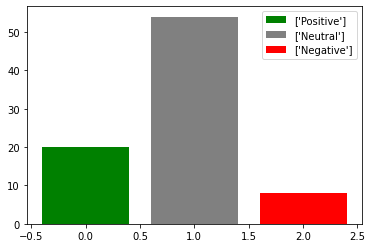

In [77]:
plt.bar([0], [len(df_pos)], label=['Positive'], color=['green'])
plt.bar([1], [len(df_neu)], label=['Neutral'], color=['grey'])
plt.bar([2], [ len(df_neg)], label=['Negative'], color=['red'])
plt.legend()
plt.show() 

In [78]:
print(len(df_neg))
print(len(df_pos))
print(len(df_neu))

8
20
54


In [79]:
import collections
from collections import Counter


In [80]:
positive_words = pd.DataFrame([dict(Counter(' '.join(df_pos['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

negative_words = pd.DataFrame([dict(Counter(' '.join(df_neg['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

neutral_words = pd.DataFrame([dict(Counter(' '.join(df_neu['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

In [81]:
positive_words

Index(['ethereum', 'crypto', 'nft', 'payment', 'eth', 'nftart', 'nfts',
       'merge', 'paybolt', 'amp', 'bitcoin', 'trading', 'po', 'terra',
       'latest', 'bill', 'asset', 'ban', 'digital', 'new', 'tabled', 'russian',
       'live', 'btc', 'nftcommunity', 'altcoins', 'secure', 'location',
       'awesome', 'price', 'vault', 'join', 'playing', 'found',
       'coinhuntworld', 'fast', 'ecommerce', 'line', 'bitcon', 'auction',
       'bounty', 'proof', 'fantasy', 'reality', 'value', 'shill', 'fine', 'go',
       'cryptocurrency', 'exchange', 'lbank', 'best', 'metaverse', 'binance',
       'available', 'item', 'itemverse', 'stake', 'buying', 'successful',
       'blue', 'contributor', 'community', 'partner', 'top', 'coinboost',
       'reward', 'sending', 'everyone', 'speed', 'lightning', 'test',
       'merchant', 'mortar', 'brick', 'terminal', 'gasfeesupdates', 'ropsten',
       'user', 'shared', 'today', 'slow', 'hepsiburada', 'nftcollector',
       'first', 'shirt', 'altcoin', 'un

In [82]:
negative_words

Index(['ethereum', 'eth', 'rarible', 'nonfungible', 'digitalasset', 'nft',
       'collectible', 'desperate', 'look', 'testnet', 'ropsten', 'celebrates',
       'community', 'coolwhipeum', 'surge', 'power', 'go', 'available',
       'merge', 'bitcoin', 'live', 'blockchain', 'crypto', 'measure',
       'trading', 'decade', 'long', 'chinese', 'espionage', 'campaign',
       'target', 'southeast', 'protect', 'love', 'call', 'market', 'via',
       'found', 'golgotha', 'created', 'cubeevader', 'через', 'thing', 'need',
       'bear', 'focus', 'time', 'income', 'work', 'hard', 'investment', 'rank',
       'high', 'low', 'much', 'fam', 'asia'],
      dtype='object')

In [84]:
# DATAFRAME OF SENTIMENT ANALYSIS OF THE COINS

# initialize list of lists
data = [['Positive', len(positive_words)], ['Neutral', len(neutral_words)], ['Negative', len(negative_words)]]



In [128]:
df = pd.DataFrame(data, columns=['Positive', 'Neutral', 'Negative'])

ValueError: 3 columns passed, passed data had 2 columns

In [86]:
data = {'Name': ['ETH'],
        'Positive': [len(df_pos)],
        'Neutral':[len(df_neu)],
        'Negative': [len(df_neg)] }


In [87]:
data = pd.DataFrame(data)
data

,Name,Positive,Neutral,Negative
0,ETH,20,54,8


In [88]:
data.to_csv('ETH_sentiment_analysis.csv')

In [112]:
##positive_words_df = pd.DataFrame(positive_words)

In [262]:
#negative_words_df = pd.DataFrame(negative_words)

In [263]:
#negative_words_df

In [265]:
#tweets_df['Polarity'] = tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)
#tweets_df['Result'] = tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [266]:
# df['category'].value_counts().plot(kind='bar')


In [274]:
plt.bar((positive_words).value_counts(), label=['Positive'], color=['green'])
plt.bar((negative_words).value_counts(), label=['Negative'], color=['red'])
plt.legend()
plt.show() 

TypeError: bar() missing 1 required positional argument: 'height'

In [268]:
#new_date = []

#for i in tweetsdf['date']:
   # a[5] + ' ' + a[1] + ' ' + a[2] + ' ' + a[3]
   # print(new_date)

In [269]:
## example

#new = []
#for tw in api.search_tweets(search, count=100):
 #   date = tw._json['created_at']
 #   text = tw._json['text']
 #   new.append({'date': date, 'text': text})

In [270]:
user = api.get_user(screen_name = 'cryptofeednews')._json
user['id']

950294018721763328

In [271]:
tweets =api.user_timeline(user_id = 950294018721763328)

In [272]:
for i in tweets:
    print(i._json['text'])

🔥🔥🔥 UNIQUE #NFT COLLECTION! 🔥🔥🔥

Disappearing Billionaires

Mark Zuckerberg (@meta)

Super rare artifact. Artwork b… https://t.co/Na8RC3Eib2
🔥🔥🔥HOTTEST #NFT COLLECTION! 🔥🔥🔥

Disappearing Billionaires

Elon Musk (@elonmusk)

Buy this Digital Masterpiece bef… https://t.co/OLJDvIWgZt
RT @PancakeSwap: ✍️ Unfortunately, the latest IFO proposal has been rejected. We will go back to the drawing board, make some adjustments b…
RT @BNBDtoken: 🚀 Secure your investment and get ready to fly!

Our referral program includes 4 levels of referral rewards. For the friends…
@BNBDriver 🎉 Congratulations!
RT @BNBDriver: 🔥 150 #BNB INVESTED

Thank #BNBDriver Community!
The light of a team’s unity is so powerful that it is able to irradiate the…
RT @binance: #Binance will support the @CeloOrg $CELO network upgrade &amp; hard fork.

Deposits and withdrawals of $CELO will be suspended app…
RT @VextPro: 💰#ApeSwap Pool increases the reward💰

Farm the #BANANA token on the #VEXTpro platform and get increased pass